<a href="https://colab.research.google.com/github/Farahesmail/project/blob/main/EDA_Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA



In [ ]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
data=pd.read_excel("first inten project.xlsx")

In [ ]:
data.shape

(36285, 17)

In [ ]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
data['date of reservation'] = pd.to_datetime(
    data['date of reservation'],
    errors='coerce')
data['date of reservation'] = data['date of reservation'].fillna(pd.Timestamp('2018-02-28'))



In [ ]:
data['Year'] = data['date of reservation'].dt.year
data['Month'] = data['date of reservation'].dt.month
data['Month_Name'] = data['date of reservation'].dt.month_name()

In [ ]:
reservations_per_month = data.groupby('Month_Name').size()
print(reservations_per_month)
reservations_per_year = data.groupby('Year').size()
print(reservations_per_year)


Month_Name
April        2737
August       3813
December     3022
February     1705
January      1014
July         2921
June         3203
March        2358
May          2599
November     2981
October      5320
September    4612
dtype: int64
Year
2015        1
2016        1
2017     6516
2018    29767
dtype: int64


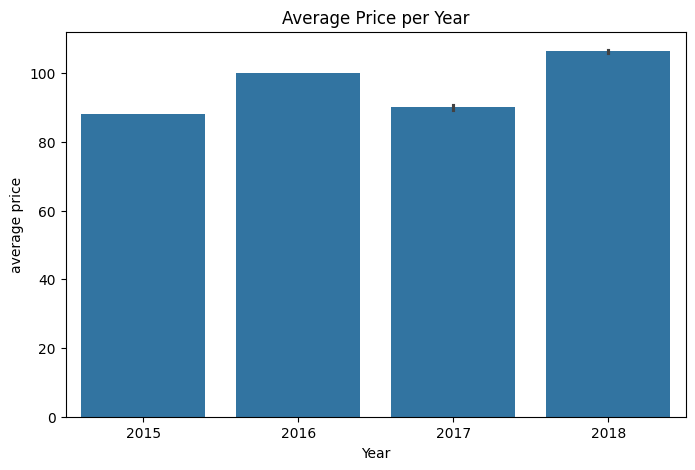

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Year', y='average price')
plt.title('Average Price per Year')
plt.show()


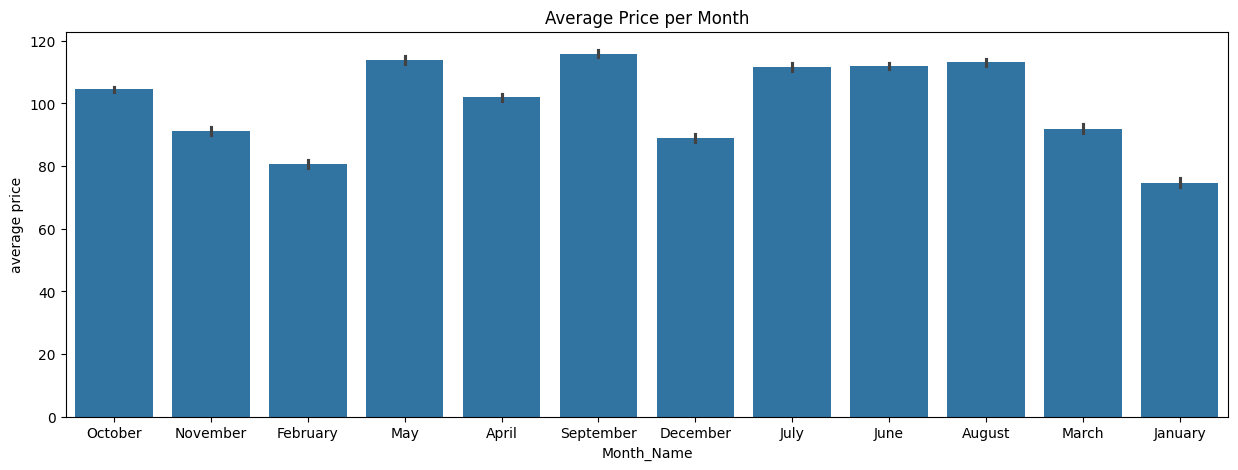

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Month_Name', y='average price')
plt.title('Average Price per Month')
plt.show()


In [ ]:
year_status = pd.crosstab(data['Year'], data['booking status'])

print(year_status)

booking status  Canceled  Not_Canceled
Year                                  
2015                   0             1
2016                   1             0
2017                 962          5554
2018               10926         18841


In [ ]:
month_status = pd.crosstab(data['Month_Name'], data['booking status'])

print(month_status)

booking status  Canceled  Not_Canceled
Month_Name                            
April                996          1741
August              1488          2325
December             402          2620
February             431          1274
January               24           990
July                1314          1607
June                1291          1912
March                700          1658
May                  949          1650
November             875          2106
October             1880          3440
September           1539          3073


In [ ]:
data['Total_Guests'] = data['number of adults'] + data['number of children']
data['Total_Nights'] = data['number of weekend nights'] + data['number of week nights']

/tmp/ipython-input-46210868.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Guests', y='special requests', ci=None,)


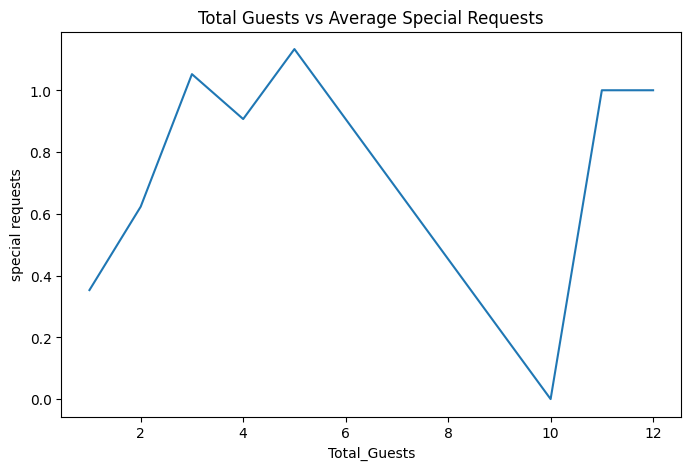

/tmp/ipython-input-46210868.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Guests', y='booking status', ci=None,)


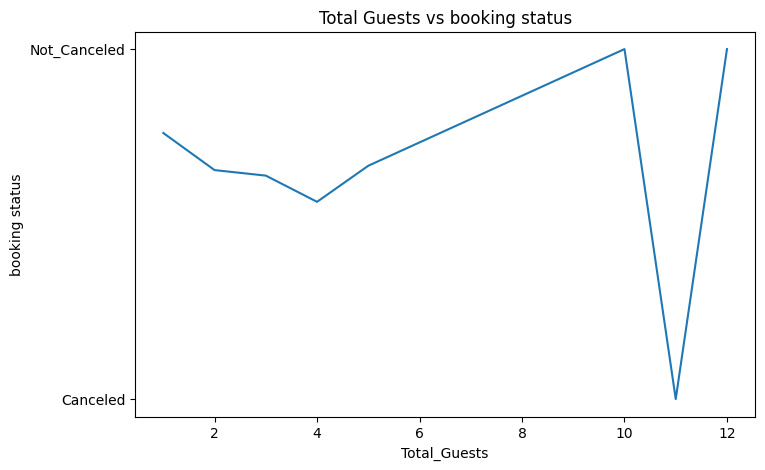

/tmp/ipython-input-46210868.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Total_Nights', y='booking status', ci=None)


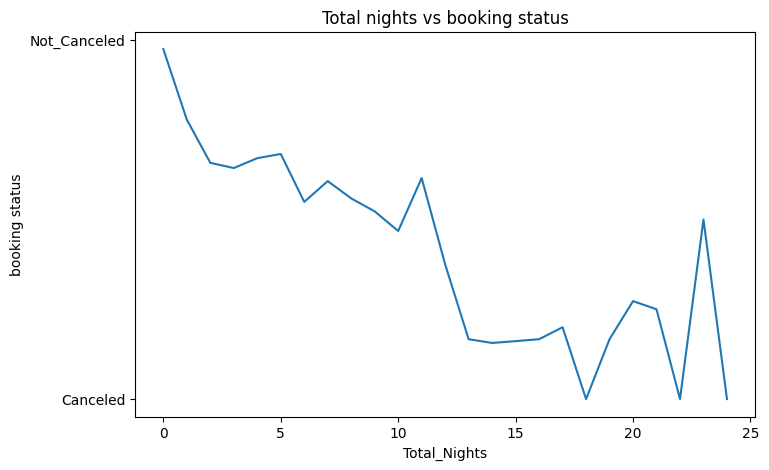

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Guests', y='special requests', ci=None,)
plt.title('Total Guests vs Average Special Requests')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Guests', y='booking status', ci=None,)
plt.title('Total Guests vs booking status')
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=data, x='Total_Nights', y='booking status', ci=None)
plt.title('Total nights vs booking status')
plt.show()



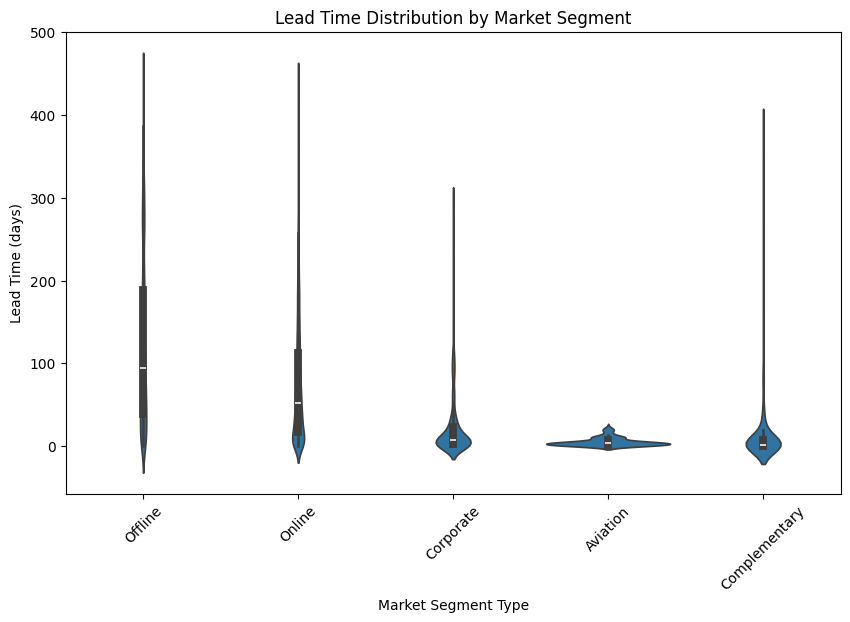

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, x='market segment type', y='lead time')
plt.title('Lead Time Distribution by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.show()


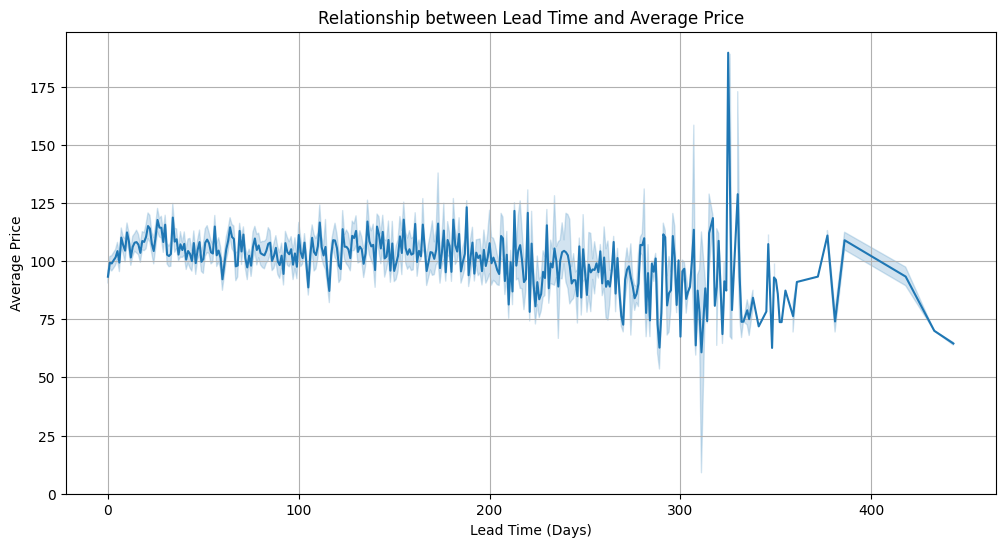

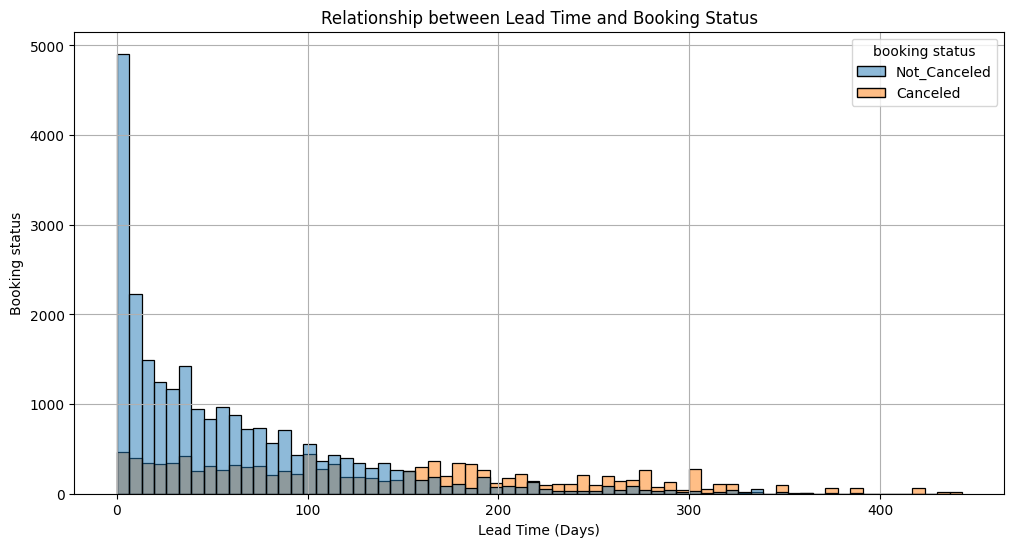

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='lead time', y='average price', data=data)

plt.title('Relationship between Lead Time and Average Price')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='lead time', hue='booking status')
plt.title('Relationship between Lead Time and Booking Status')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Booking status')
plt.grid(True)
plt.show()

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


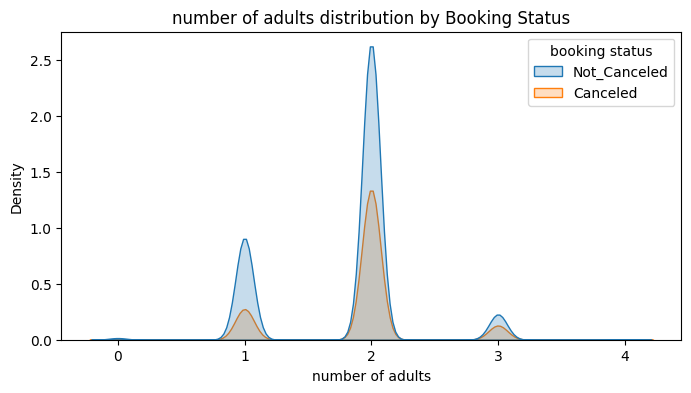

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


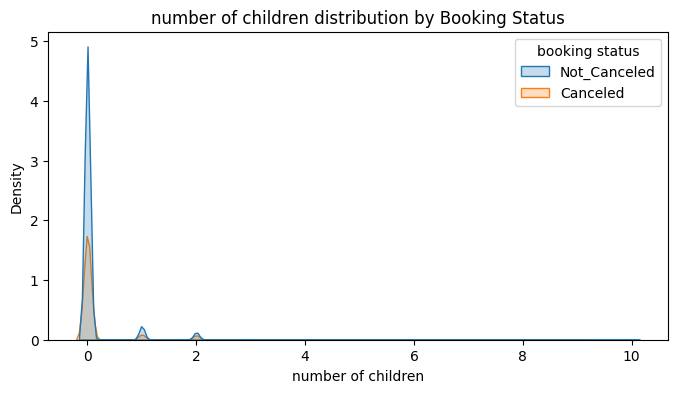

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


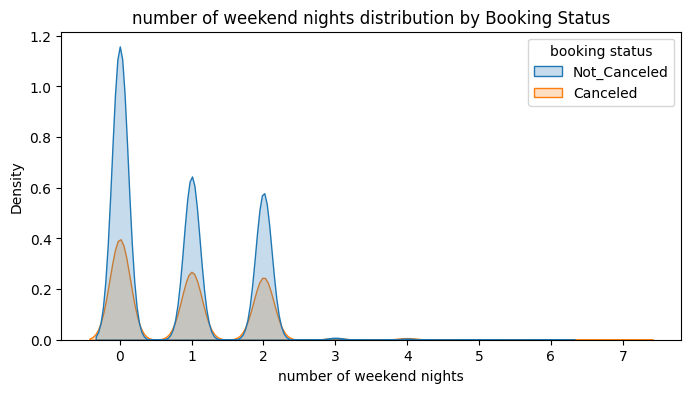

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


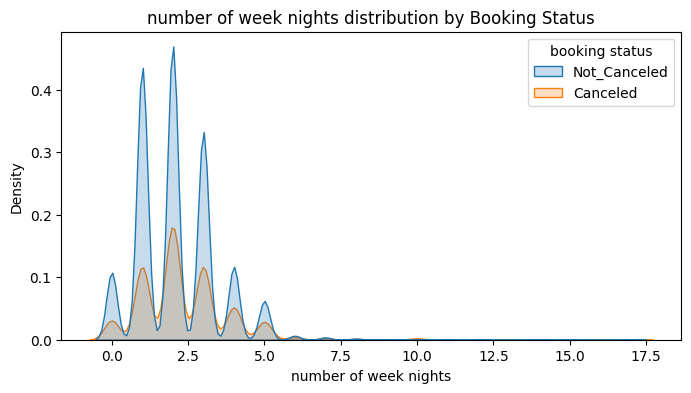

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


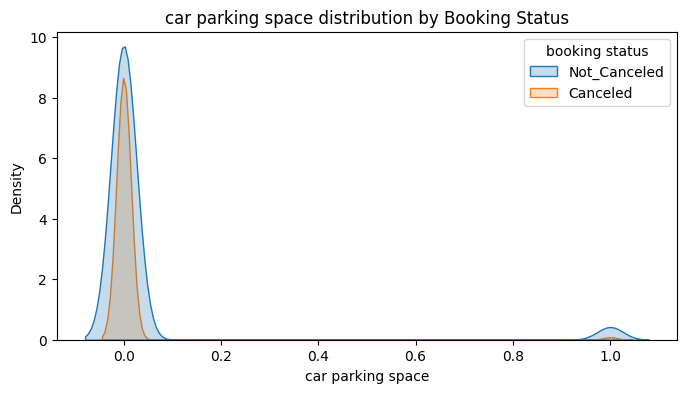

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


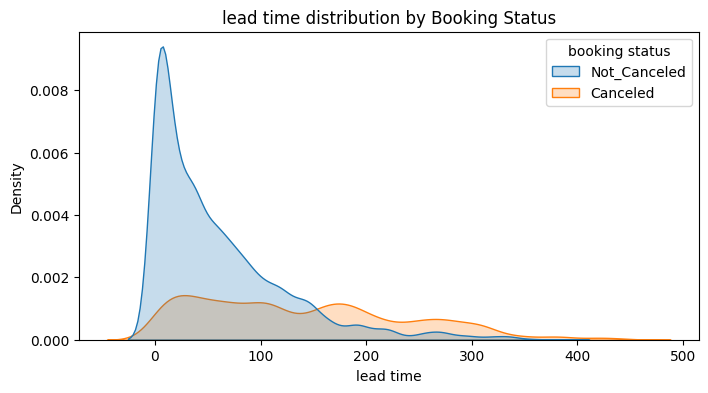

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


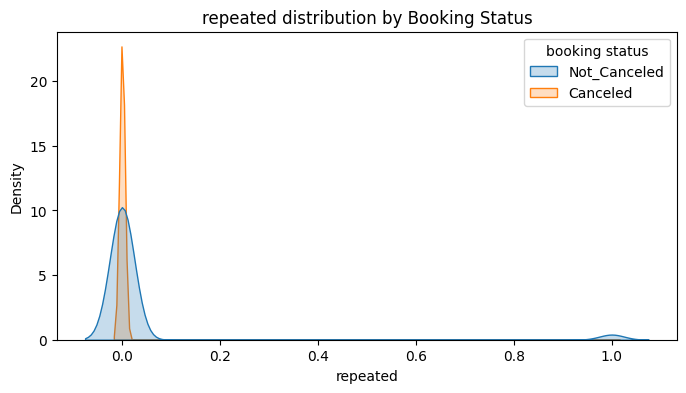

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


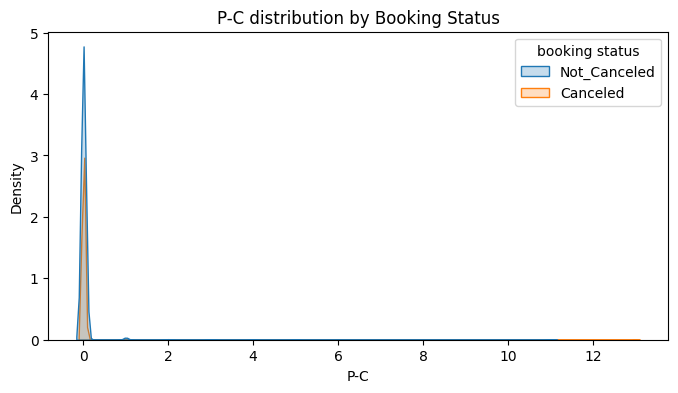

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


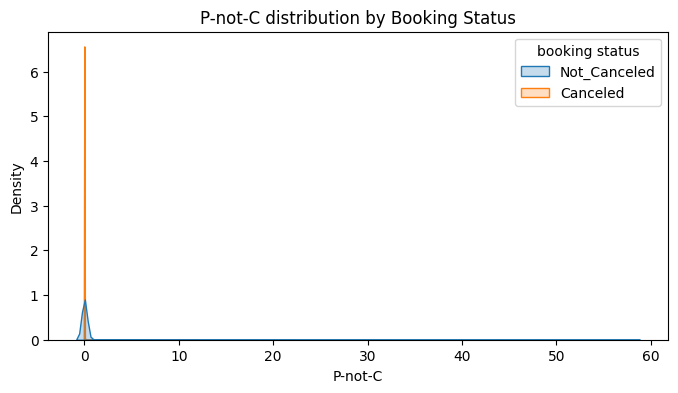

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


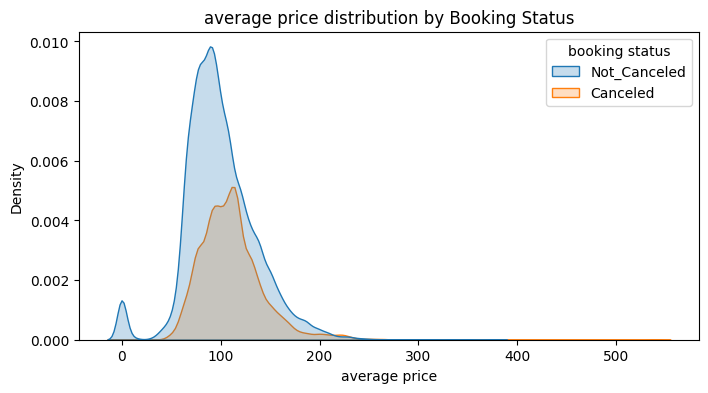

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


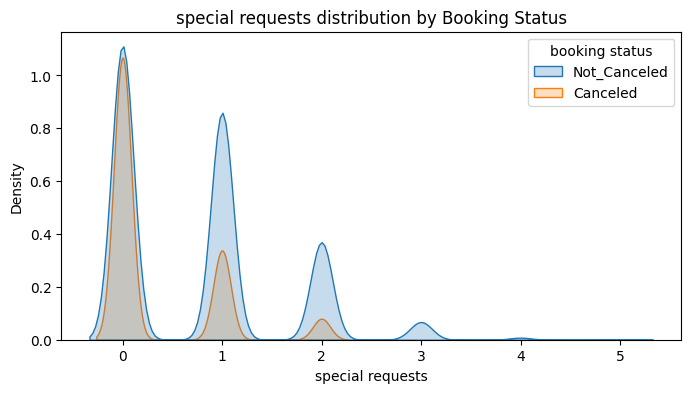

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


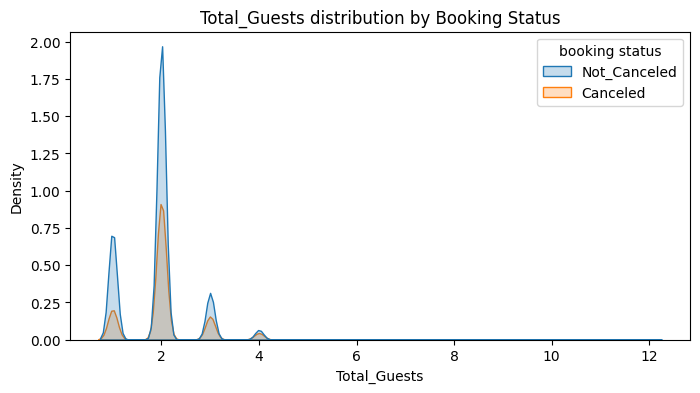

/tmp/ipython-input-2323628808.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=col, hue='booking status', shade=True)


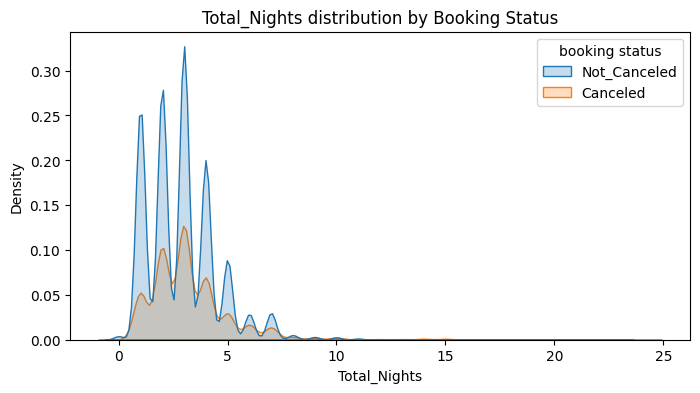

In [ ]:
numeric_colss = data.select_dtypes(include=["int64","float64"]).columns
for col in numeric_colss:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=data, x=col, hue='booking status', shade=True)
    plt.title(f'{col} distribution by Booking Status')
    plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


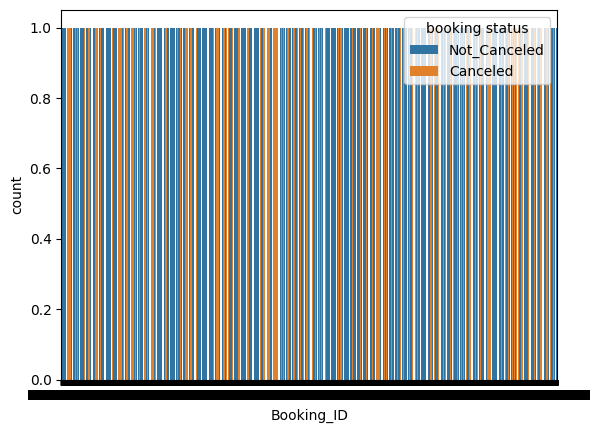

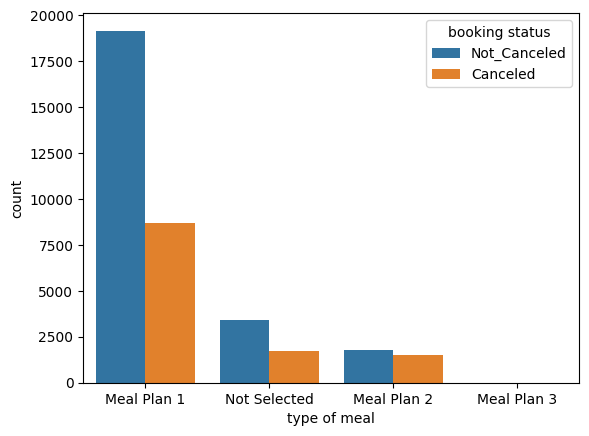

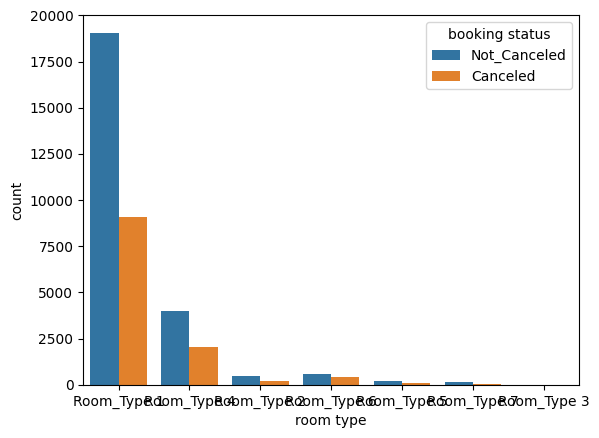

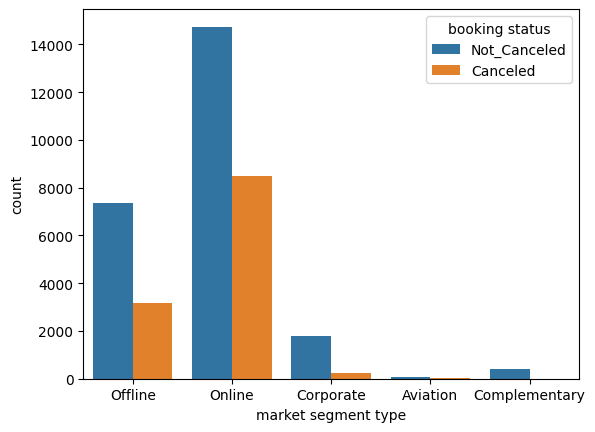

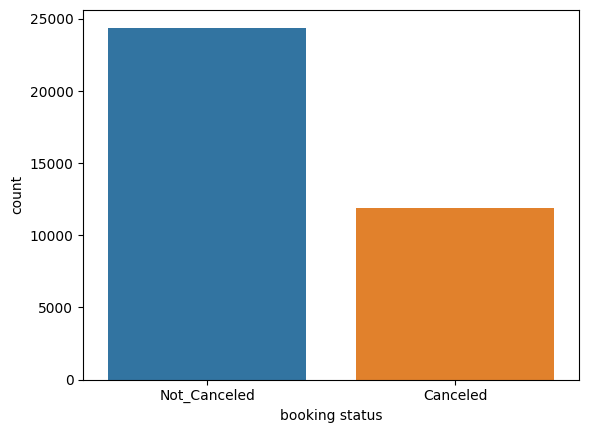

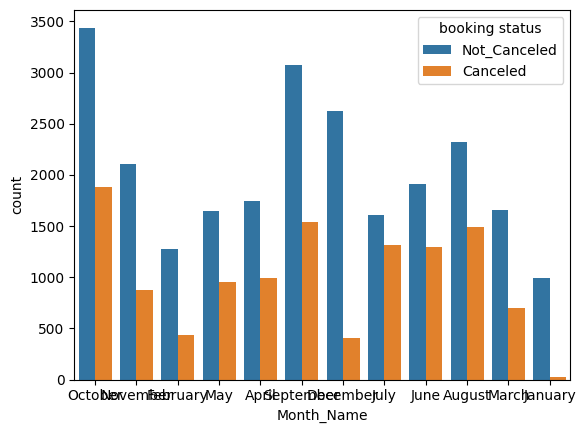

In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    sns.countplot(data=data,x=col,hue='booking status')
    plt.show()
